1. Plot the rolling 20-day minimum of the Facebook closing  price with the pandas plot() method.

<AxesSubplot:title={'center':'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date', ylabel='min closing price'>

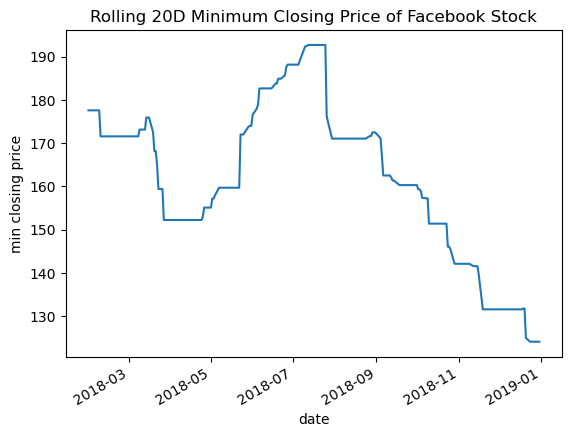

In [33]:
# importing and installing neccessary libraries 
!pip install scipy
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
facebook = pd.read_csv(r'C:\Users\bharo\OneDrive\Documents\fb_stock_prices_2018.csv',index_col='date', parse_dates=True)
fb =facebook['close'].rolling(20).min() #selecting close column with 20 day roll with min()
fb.plot(title = 'Rolling 20D Minimum Closing Price of Facebook Stock', ylabel = 'min closing price') 

2.Create a histogram and KDE of the change from open to close in the price of Facebook stock.

<AxesSubplot:title={'center':"Facebook Stock Price's Daily Change from Open to Close"}, xlabel='Price ($)', ylabel='Density'>

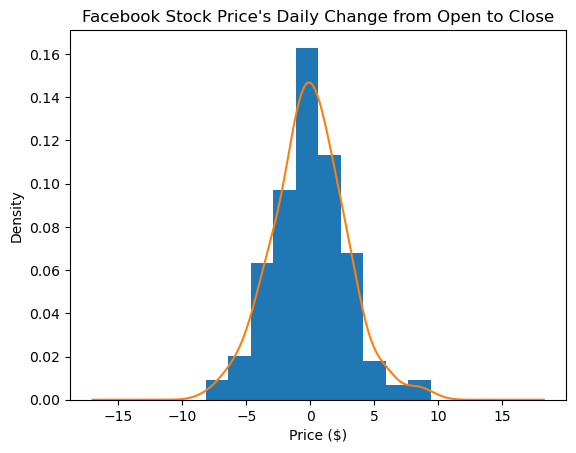

In [34]:
import seaborn as sns
change = facebook.open - facebook.close # differece of open and close price of FB stock
# ploting histogram
change.plot (kind = 'hist', density = True, title='Facebook Stock Price\'s Daily Change from Open to Close')
plt.xlabel('Price ($)')
change.plot(kind = 'kde') #plot KDE




3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

array([<AxesSubplot:title={'center':'mag'}, xlabel='magType'>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

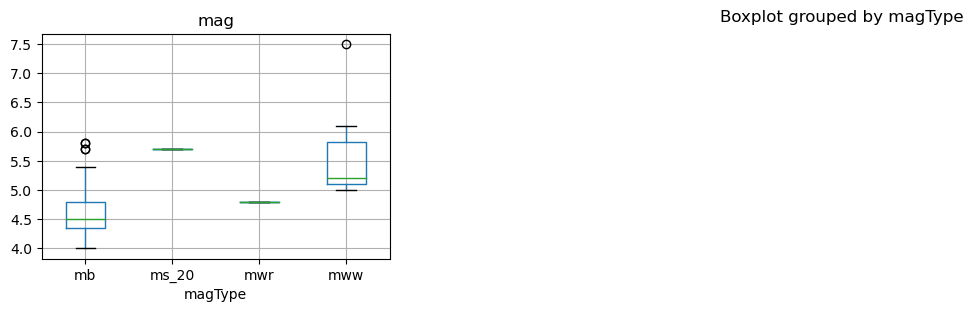

In [35]:
df = pd.read_csv(r'C:\Users\bharo\OneDrive\Desktop\math for data science\parsed.csv')
df_indonesia = df.query("parsed_place == 'Indonesia'")[['mag', 'magType']]# select Indonesia's ["mag"],['magType']

df_indonesia.boxplot(column='mag', by= 'magType', layout =(1,4),figsize=(20,3) )# plot boxplot



4. Make a line plot of the difference between weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

<AxesSubplot:title={'center':'Difference between Weekly Maximum High Price\n and Weekly Minimum Low Price of Facebook Stock'}, xlabel='date', ylabel='difference'>

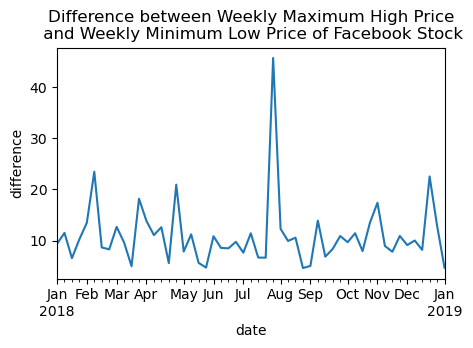

In [36]:
# resalping data by weekly and aggregation by high='max', low='min'
fb = facebook.resample('1W').agg( dict(high='max', low='min'))
difference = fb.high - fb.low # difference
difference.plot(
    title='Difference between Weekly Maximum High Price\n and Weekly Minimum Low Price of Facebook Stock', 
    ylabel = 'difference', figsize = (5,3)) # plot difference


5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

1.The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review last chapter's time series section for an easy way to do this).

2. The second subplot will be a bar plot showing the net effect this had monthly using resample().

Bonus 1: Color the bars by whether they are gains in the stock price (green) or drops in the stock price (red).

Bonus 2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.



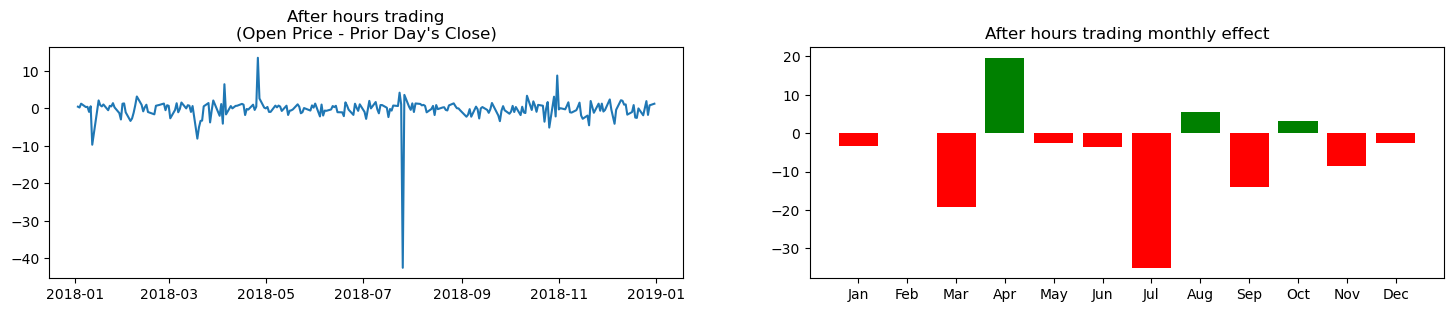

In [43]:
#shift() function Shift index by desired number of periods with an optional time freq.
series = (facebook.open - facebook.close.shift()) 
monthly_effect = series.resample('1M').sum() # resample by month and agg with sum
df = monthly_effect.to_frame().reset_index() # coverting series to df for ploting
df = df.rename(columns= {0: 'net'})# renaming column
df.index.name = 'index'

x = df['date'].dt.month_name().str[:3]# modify the date to three letter abbreviation and store in x var
y = df['net']# store net column in y var


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,3)) # creating multiple lot usng subplot()
ax1.plot(series)
ax1.set_title('After hours trading\n(Open Price - Prior Day\'s Close)') # plot 1

ax2.bar(x,y,color=np.where(monthly_effect >= 0, 'g', 'r')) # plot 2
ax2.set_title('After hours trading monthly effect')

plt.show()
